In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('titanic_dataset.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# passenger id as index column

In [3]:
data = pd.read_csv('titanic_dataset.csv',index_col='PassengerId')
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# basic details of dataset

In [4]:
data.shape

(891, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
data.isna().sum()  #missing values

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

# filling the missing values

In [8]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

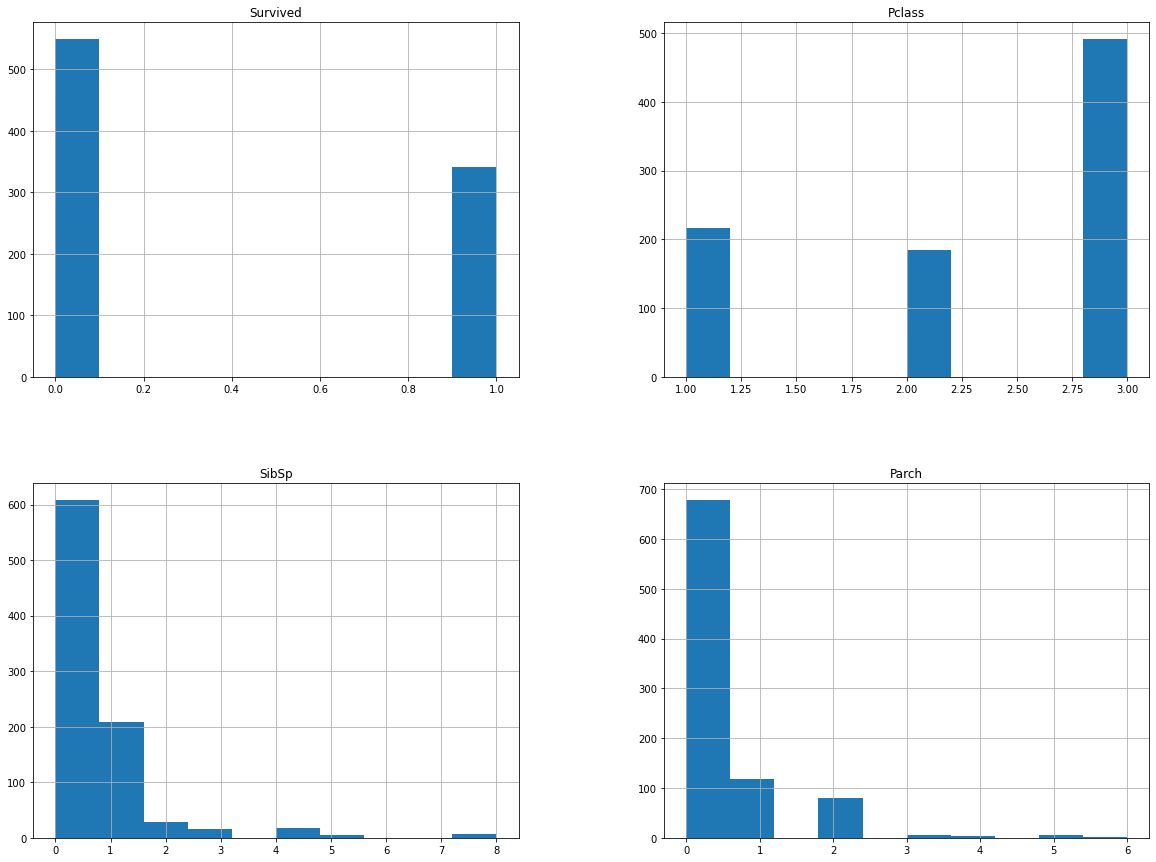

In [9]:
freqgraph= data.select_dtypes(include=['int64'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [10]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [12]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

# check and handle outliers

Text(0.5, 1.0, 'Age')

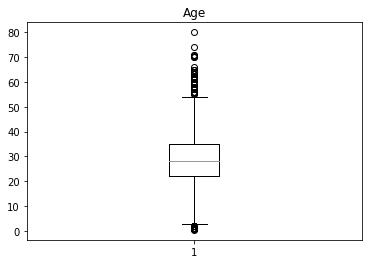

In [14]:
plt.boxplot(data['Age'])
plt.title('Age')

In [15]:
q1 = np.percentile(data['Age'],25,interpolation='midpoint')
q2 = np.percentile(data['Age'],50,interpolation='midpoint')
q3 = np.percentile(data['Age'],75,interpolation='midpoint')

In [16]:
print(q1)
print(q2)
print(q3)

22.0
28.0
35.0


In [17]:
data['Age'].median()

28.0

In [18]:
IQR = q3-q1

In [24]:
low_lim = q1-2*IQR
up_lim = q2+2*IQR

In [25]:
print( low_lim)
print( up_lim)

-4.0
54.0


In [26]:
outlier = []
for x in data['Age']:
    if((x>up_lim)or (x<low_lim)):
        outlier.append(x)
        

In [27]:
outlier

[58.0,
 55.0,
 66.0,
 65.0,
 59.0,
 71.0,
 70.5,
 55.5,
 61.0,
 56.0,
 58.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 61.0,
 60.0,
 64.0,
 65.0,
 56.0,
 63.0,
 58.0,
 55.0,
 71.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 57.0,
 62.0,
 74.0,
 56.0]

In [28]:
ind1 = data['Age']>up_lim
data.loc[ind1].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [29]:
data.drop([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],inplace= True)

Text(0.5, 1.0, 'Age')

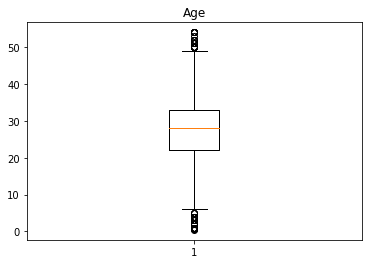

In [30]:
plt.boxplot(data['Age'])
plt.title('Age')

Text(0.5, 1.0, 'Fare')

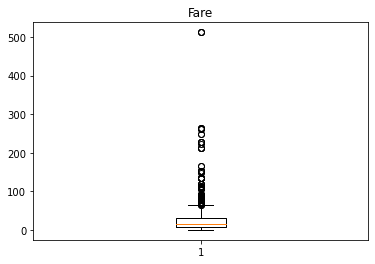

In [31]:
plt.boxplot(data['Fare'])
plt.title('Fare')

In [32]:
q1 = np.percentile(data['Fare'],25,interpolation='midpoint')
q2 = np.percentile(data['Fare'],50,interpolation='midpoint')
q3 = np.percentile(data['Fare'],75,interpolation='midpoint')

In [33]:
print(q1)
print(q2)
print(q3)

7.8958
14.1083
30.5


In [34]:
data['Fare'].median()

14.1083

In [35]:
IQR = q3-q1

In [36]:
low_lim = q1-3*IQR
up_lim = q2+3*IQR

In [37]:
print(low_lim)
print(up_lim)

-59.9168
81.9209


In [38]:
outlier = []
for x in data['Fare']:
    if((x>up_lim)or (x<low_lim)):
        outlier.append(x)

In [39]:
outlier

[263.0,
 146.5208,
 82.1708,
 83.475,
 263.0,
 247.5208,
 113.275,
 90.0,
 83.475,
 90.0,
 86.5,
 512.3292,
 135.6333,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 135.6333,
 153.4625,
 133.65,
 134.5,
 263.0,
 135.6333,
 82.1708,
 211.5,
 227.525,
 120.0,
 113.275,
 90.0,
 120.0,
 89.1042,
 91.0792,
 90.0,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 106.425,
 110.8833,
 227.525,
 110.8833,
 153.4625,
 133.65,
 512.3292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 262.375,
 86.5,
 120.0,
 211.3375,
 120.0,
 93.5,
 83.1583,
 89.1042,
 164.8667]

In [40]:
ind1 = data['Fare']>up_lim
data.loc[ind1].index

Int64Index([ 28,  32,  35,  63,  89, 119, 216, 225, 231, 246, 258, 259, 270,
            292, 298, 300, 306, 307, 308, 311, 312, 319, 320, 326, 333, 335,
            338, 342, 374, 376, 378, 381, 391, 394, 413, 436, 454, 485, 487,
            499, 505, 506, 521, 528, 538, 545, 551, 558, 582, 610, 661, 680,
            690, 699, 701, 709, 717, 731, 738, 743, 760, 764, 780, 803, 821,
            836, 850, 857],
           dtype='int64', name='PassengerId')

In [41]:
data.drop([28,  32,  35,  63,  89, 119, 216, 225, 231, 246, 258, 259, 270,
            292, 298, 300, 306, 307, 308, 311, 312, 319, 320, 326, 333, 335,
            338, 342, 374, 376, 378, 381, 391, 394, 413, 436, 454, 485, 487,
            499, 505, 506, 521, 528, 538, 545, 551, 558, 582, 610, 661, 680,
            690, 699, 701, 709, 717, 731, 738, 743, 760, 764, 780, 803, 821,
            836, 850, 857],inplace=True)

Text(0.5, 1.0, 'Fare')

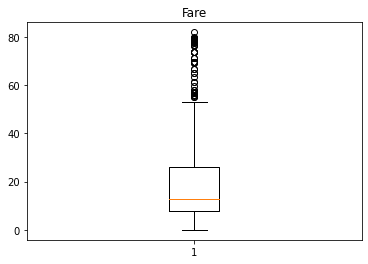

In [42]:
plt.boxplot(data['Fare'])
plt.title('Fare')

# min max scaling

In [90]:
y=data['Age']

In [91]:
x=data.drop(columns=['Age','Name', 'Sex', 'Cabin', 'Embarked','Ticket'])

In [92]:
x.describe()

,Survived,Pclass,SibSp,Parch,Fare
count,781.000000,781.000000,781.000000,781.000000,781.000000
mean,0.353393,2.464789,0.526248,0.366197,20.383178
std,0.478330,0.747887,1.148417,0.804847,18.066951
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,0.000000,0.000000,13.000000
75%,1.000000,3.000000,1.000000,0.000000,26.250000
max,1.000000,3.000000,8.000000,6.000000,81.858300


In [93]:
type(x)

pandas.core.frame.DataFrame

In [94]:
from sklearn import preprocessing

In [95]:
standardisation=preprocessing.StandardScaler()

In [96]:
x.columns

Index(['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [97]:
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))

In [98]:
x = minmax.fit_transform(x)

In [99]:
x = pd.DataFrame(x)

In [100]:
x.describe

<bound method NDFrame.describe of        0    1      2         3         4
0    0.0  1.0  0.125  0.000000  0.088568
1    1.0  0.0  0.125  0.000000  0.870813
2    1.0  1.0  0.000  0.000000  0.096814
3    1.0  0.0  0.125  0.000000  0.648682
4    0.0  1.0  0.000  0.000000  0.098341
..   ...  ...    ...       ...       ...
776  0.0  0.5  0.000  0.000000  0.158811
777  1.0  0.0  0.000  0.000000  0.366487
778  0.0  1.0  0.125  0.333333  0.286471
779  1.0  0.0  0.000  0.000000  0.366487
780  0.0  1.0  0.000  0.000000  0.094676

[781 rows x 5 columns]>

In [102]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(x_train,y_train)
predictions= model.predict(x_test)


In [105]:
from sklearn.metrics import mean_squared_error
print('MSE is :',mean_squared_error(y_test,predictions))
from sklearn.metrics import r2_score
print('R squared valueis:',r2_score(y_test,predictions))

MSE is : 98.2553453486151
R squared valueis: 0.18974833748226894
